In [138]:
import pymolpro
import pandas as pd

In [139]:
backend = 'local' 
project_name = 'BHDIV10_methodtest'
parallel = 8

In [140]:
methods = {"HF": "hf",
"MP2": "mp2",
"MP3": "mp3",
"MP4": "mp4",
"PAPT2":"PAPT;MP2",
"PAPT3":"PAPT;MP3",
"PAPT4":"PAPT;MP4",
"CCSD":"CCSD",
"CCSD(T)":"CCSD(T)" }
bases = ['cc-pVDZ','cc-pVTZ']

In [141]:
db = pymolpro.database.load("GMTKN55_BHDIV10")

In [142]:
small=db.subset(open_shell=False,max_electrons=30)
print(small)

GMTKN55 BHDIV10 (closed shell only) (maximum number of electrons 30):

Molecules:
ts5: {'geometry': '10\n  \n B     0.0000000    0.0000000   -2.3759884 \n H     0.5905364    1.0228391   -2.5936411 \n H     0.5905364   -1.0228391   -2.5936411 \n H    -1.1810728    0.0000000   -2.5936411 \n P    -0.0000000    0.0000000    1.7684168 \n H     0.6165007    1.0678105    2.4225352 \n H     0.6165007   -1.0678105    2.4225352 \n H    -1.2330014    0.0000000    2.4225352 \n H     0.0000000    0.0000000   -1.0070281 \n H    -0.0000000    0.0000000   -0.1475438 \n', 'description': 'ts5'}
ts4: {'geometry': '11\n  \n C    -0.2859289    0.9184703    1.0736652 \n C    -0.4034021   -0.6529505   -0.3445861 \n C     0.7266145   -0.7363334   -1.2029949 \n H    -0.1370899    1.9111760    0.6466858 \n H     0.4520114    0.7052124    1.8459804 \n H     0.4779536    0.2142783   -0.1301686 \n H    -1.2954707    0.8256305    1.4690274 \n H    -1.3320510   -0.2613236   -0.7376201 \n H    -0.5171754   -1.3832741

In [143]:
results = {}
for method in methods:
    results[method] = {}
    for basis in bases:
        results[method][basis] = pymolpro.database.run(small, methods[method], basis, location=project_name,
                                                       preamble= 'angstrom' ,backend=backend ,parallel=parallel)
        if results[method][basis].failed: print(method, basis, 'failed', results[method][basis].project_directory)
        
print(results)       

{'HF': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f303565ca30>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f303565d960>}, 'MP2': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f303560b310>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f3035657880>}, 'MP3': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f3035657130>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f30356561d0>}, 'MP4': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f303562a1a0>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f303562add0>}, 'PAPT2': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f303562a7a0>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f3035655ab0>}, 'PAPT3': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f3035656110>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f3035654190>}, 'PAPT4': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f3035656020>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f3035656650>}, 'CCSD':

In [144]:
extrapolate={}
for method in  methods:
    extrapolate[method]=pymolpro.database.basis_extrapolate(results[method].values(), results["HF"].values())[0]
print(extrapolate)

{'HF': <pymolpro.database.Database object at 0x7f3035651cf0>, 'MP2': <pymolpro.database.Database object at 0x7f30356526b0>, 'MP3': <pymolpro.database.Database object at 0x7f3035651ab0>, 'MP4': <pymolpro.database.Database object at 0x7f3035651f90>, 'PAPT2': <pymolpro.database.Database object at 0x7f30356507c0>, 'PAPT3': <pymolpro.database.Database object at 0x7f30356528f0>, 'PAPT4': <pymolpro.database.Database object at 0x7f3035652ad0>, 'CCSD': <pymolpro.database.Database object at 0x7f3035652f20>, 'CCSD(T)': <pymolpro.database.Database object at 0x7f3035652d70>}


In [145]:
results_with_extrapolation = results
for method in results_with_extrapolation.keys():
    results_with_extrapolation[method]['cc-pV[23]Z'] = extrapolate[method]
results_with_extrapolation
results = results_with_extrapolation

pd.options.display.float_format = '{:,.2f}'.format
analyse=pymolpro.database.analyse([result['cc-pV[23]Z'] for result in results.values()],results['CCSD(T)']['cc-pV[23]Z'],unit='kJ/mol')
analyse['reaction statistics']

,HF/cc-pV[23]Z,MP2/cc-pV[23]Z,MP3/cc-pV[23]Z,MP4/cc-pV[23]Z,PAPT;MP2/cc-pV[23]Z,PAPT;MP3/cc-pV[23]Z,PAPT;MP4/cc-pV[23]Z,CCSD/cc-pV[23]Z,CCSD(T)/cc-pV[23]Z
MAD,50.01,9.71,6.16,4.02,8.65,9.01,1.36,10.55,0.00
MAXD,95.24,15.09,12.63,5.37,16.43,17.04,1.93,18.85,0.00
RMSD,63.26,11.12,7.70,4.34,10.36,10.83,1.49,12.18,0.00
MSD,49.61,0.35,6.16,-0.70,8.65,9.01,-1.36,10.55,0.00
STDEVD,48.09,13.61,5.65,5.25,6.98,7.35,0.75,7.47,0.00


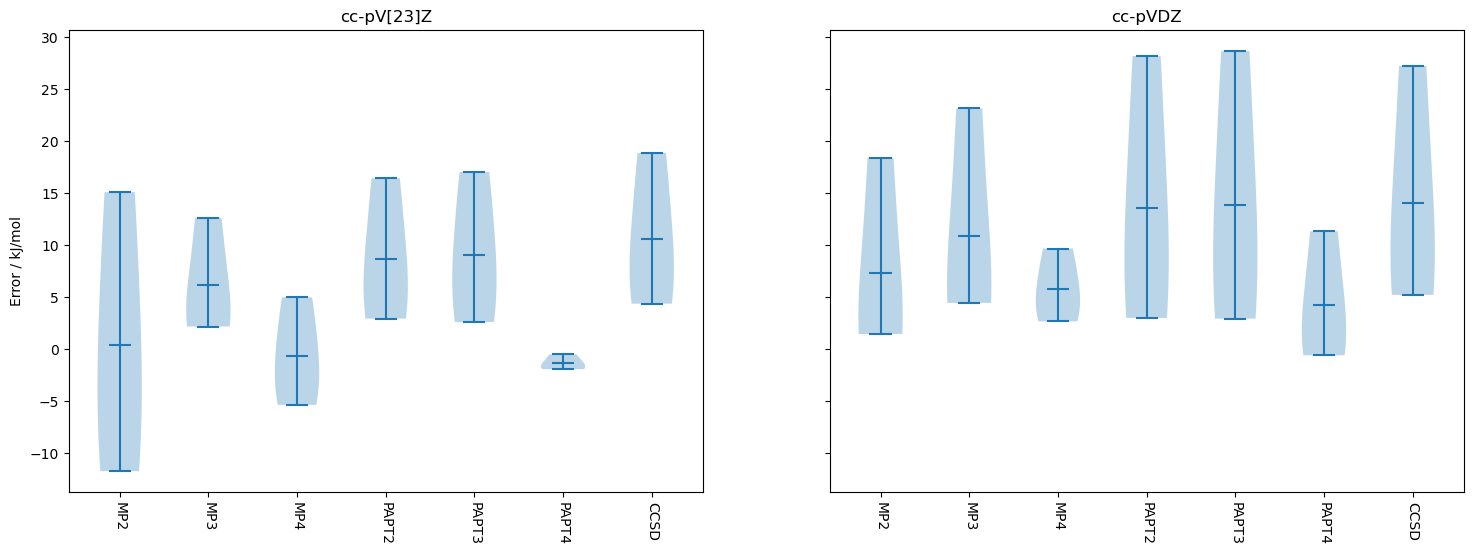

In [146]:
import matplotlib.pyplot as plt

methods_pruned = [method for method in methods if (method != 'HF') and (method != 'CCSD(T)')]
bases_pruned = ['cc-pV[23]Z', 'cc-pVDZ']
fig, panes = plt.subplots(nrows=1, ncols=len(bases_pruned), sharey=True, figsize=(18, 6))

for pane in range(len(bases_pruned)):
    data = []
    for method in methods_pruned:
        data.append(
            pymolpro.database.analyse(results[method][bases_pruned[pane]],
                                      results['CCSD(T)']['cc-pV[23]Z'],'kJ/mol')['reaction energy deviations'].to_numpy()[:, 0]
        )
    panes[pane].violinplot(data, showmeans=True, showextrema=True, vert=True, bw_method='silverman')
    panes[pane].set_xticks(range(1, len(methods_pruned) + 1), labels=methods_pruned, rotation=-90)
    panes[pane].set_title(bases_pruned[pane])
panes[0].set_ylabel('Error / kJ/mol')
plt.savefig(project_name + ".violin.pdf")
df = pd.DataFrame(data)
df.to_excel("PAPT.xlsx")